## Support Vector Machines 

This code shows an example of using a Support Vector Machine (SVM) without a kernel
to solve a classification problem. The SVM is constructed from the scikit learn 
python module. Two scenarios are tested for different values for the penalty
coefficient C.

### Import, prepare, and plot data

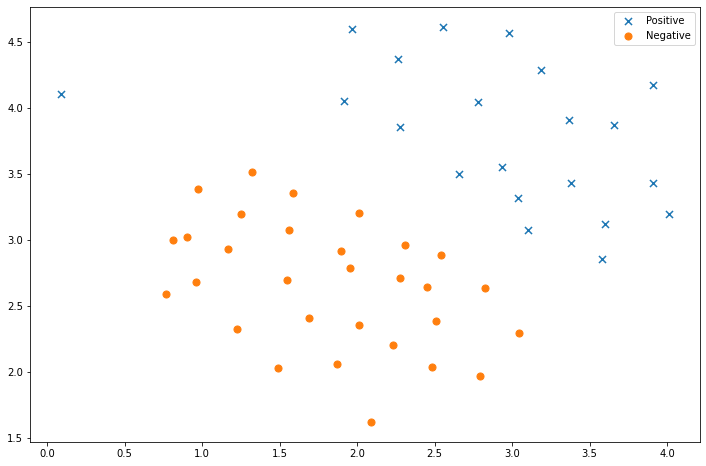

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from sklearn import svm

# Import, format, and scatter plot data:
raw_data = loadmat('ex6data1.mat')          # original data file
#raw_data = loadmat('ex6data1_2.mat')          # alternate data file, with a point in the middle between both classes (better example)

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend() 

### Create and train a high bias, low variance SVM (lower C), plot decision boundary 

0.9803921568627451


C:\Users\gorja\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 1.0, 'SVM (C=1) Decision Confidence')

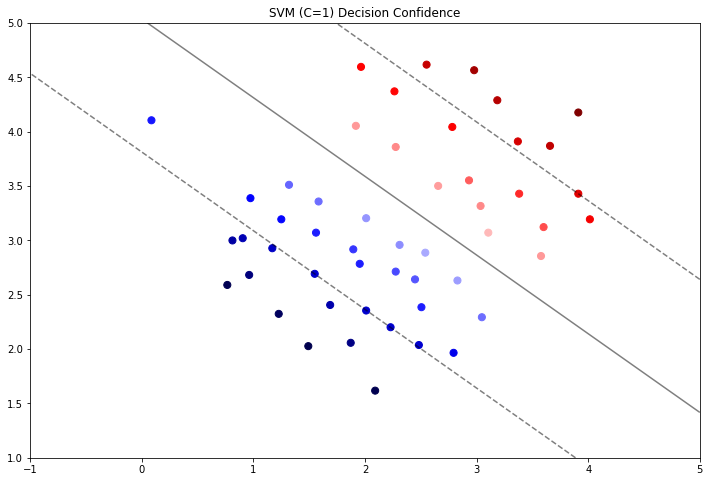

In [24]:
# create grid to evaluate model
xx = np.linspace(-1, 5, 30)
yy = np.linspace(1, 5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Create an SVM with lower C
svc1 = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc1.fit(data[['X1', 'X2']], data['y'])
print (svc1.score(data[['X1', 'X2']], data['y']))
Z1 = svc1.decision_function(xy).reshape(XX.shape)

# Plot the classifications and the decision boundary
data['SVM 1 Confidence'] = svc1.decision_function(data[['X1', 'X2']])
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.contour(XX, YY, Z1, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.set_title('SVM (C='+str(svc1.C)+') Decision Confidence')

### Create and train a low bias, high variance SVM (higher C), plot decision boundary 

0.9803921568627451


C:\Users\gorja\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 1.0, 'SVM (C=100) Decision Confidence')

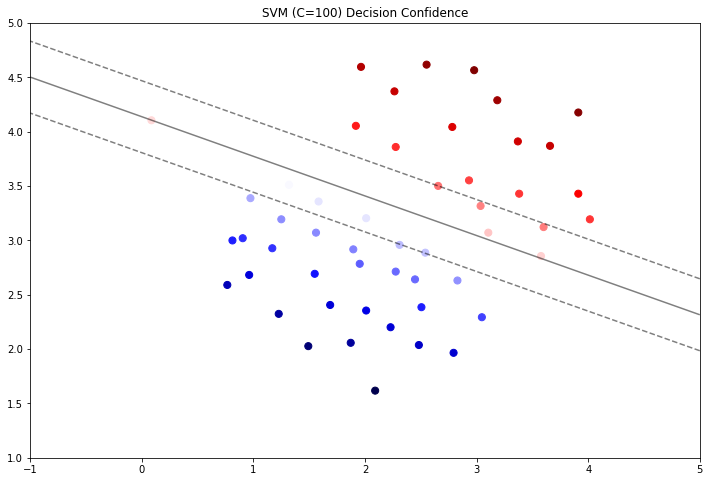

In [21]:
# create grid to evaluate model
xx = np.linspace(-1, 5, 30)
yy = np.linspace(1, 5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Create an SVM with higher C
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
print (svc2.score(data[['X1', 'X2']], data['y']))
Z2 = svc2.decision_function(xy).reshape(XX.shape) 

# Plot the classifications and the decision boundary
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.contour(XX, YY, Z2, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.set_title('SVM (C='+str(svc2.C)+') Decision Confidence') 